In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**1. Load the dataset into python environment**

In [2]:
#load dataset to python environment
data=pd.read_csv("/content/titanic_dataset.csv")

In [3]:
#print default 5 rows of data set
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#check diamension of dataset
data.shape

(891, 12)

In [5]:
#check for null values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Check for datatypes
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
#print information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#fill the null values 
data["Age"]=data["Age"].fillna(data["Age"].median())
data["Cabin"]=data["Cabin"].fillna(data["Cabin"].mode()[0])
data["Embarked"]=data["Embarked"].fillna(data["Embarked"].mode()[0])

In [9]:
#check for null values
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
#description of data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Check for outliers**

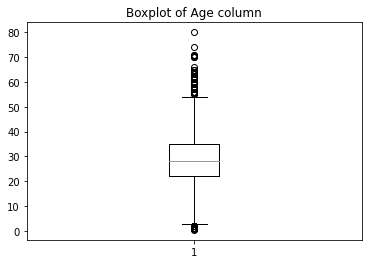

In [11]:
#box plot of column age
plt.boxplot(data['Age'])
plt.title('Boxplot of Age column')
plt.show()

In [12]:
#find Q1,Q2,Q3
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')

In [13]:
#print Q1,Q2,Q3
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [14]:
#find median
data['Age'].median()

28.0

In [15]:
#find IQR
IQR=Q3-Q1
IQR

13.0

In [16]:
#find upper and lower limt and print it
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print(low_lim)
print(up_lim)

2.5
54.5


In [17]:
outlier = []
for x in data['Age']:
    if((x>up_lim)or (x<low_lim)):
        outlier.append(x)

In [18]:
#print outlier
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [19]:
ind=data['Age']>up_lim

In [20]:
#index of outliers
data.loc[ind].index

Int64Index([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],
           dtype='int64')

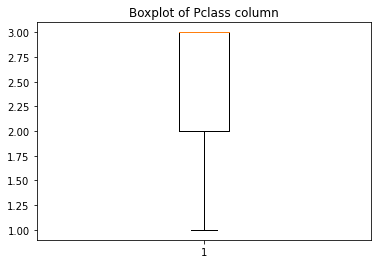

In [21]:
#boxplot of Pclass column
plt.boxplot(data['Pclass'])
plt.title('Boxplot of Pclass column')
plt.show()

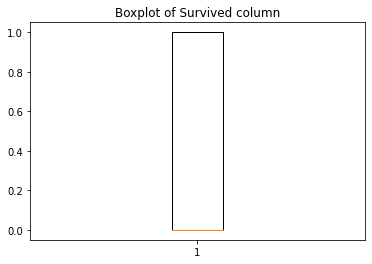

In [22]:
#boxplot of Suvived column
plt.boxplot(data['Survived'])
plt.title('Boxplot of Survived column')
plt.show()

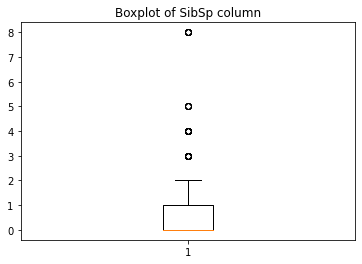

In [23]:
#boxplot of SibSp column
plt.boxplot(data['SibSp'])
plt.title('Boxplot of SibSp column')
plt.show()

In [24]:
#find Q1,Q2,Q3
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')

In [25]:
#print Q1,Q2,Q3
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [26]:
#median
data['SibSp'].median()

0.0

In [27]:
#find IQR
IQR=Q3-Q1
IQR

1.0

In [28]:
#find upper and lower limit
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print(low_lim)
print(up_lim)

-1.5
2.5


In [29]:
outlier = []
for x in data['SibSp']:
    if((x>up_lim)or (x<low_lim)):
        outlier.append(x)

In [30]:
#outlier printed
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [31]:
ind=data['SibSp']>up_lim

In [32]:
#outliers index printed
data.loc[ind].index

Int64Index([  7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863],
           dtype='int64')

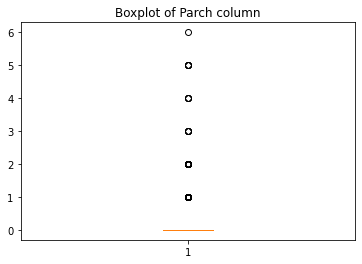

In [33]:
#boxplot of Parch column
plt.boxplot(data['Parch'])
plt.title('Boxplot of Parch column')
plt.show()

In [34]:
#find  Q1,Q2,Q3
Q1=np.percentile(data['Parch'],25,interpolation='midpoint')
Q2=np.percentile(data['Parch'],50,interpolation='midpoint')
Q3=np.percentile(data['Parch'],75,interpolation='midpoint')

In [35]:
#print Q1,Q2,Q3
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
0.0


In [36]:
#print median
data['Parch'].median()

0.0

In [37]:
IQR=Q3-Q1

In [38]:
#print IQR
IQR

0.0

In [39]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [40]:
#print upper and lower limit
print(low_lim)
print(up_lim)

0.0
0.0


In [41]:
outlier = []
for x in data['Parch']:
    if((x>up_lim)or (x<low_lim)):
        outlier.append(x)

In [42]:
#print outlier
outlier

[1,
 2,
 1,
 5,
 1,
 1,
 5,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 4,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 3,
 4,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 5,
 2,
 1,
 1,
 1,
 2,
 1,
 5,
 2,
 1,
 1,
 1,
 2,
 1,
 6,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 3,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 5,
 2]

In [43]:
ind=data['Parch']>up_lim

In [44]:
#index of outliers printed
data.loc[ind].index

Int64Index([  7,   8,  10,  13,  16,  24,  25,  27,  43,  50,
            ...
            855, 856, 858, 863, 869, 871, 879, 880, 885, 888],
           dtype='int64', length=213)

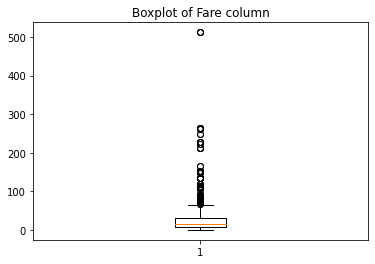

In [45]:
#boxplot of Fare column
plt.boxplot(data['Fare'])
plt.title('Boxplot of Fare column')
plt.show()

In [46]:
#find Q1,Q2,Q3
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')

In [47]:
#print Q1,Q2,Q3
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [48]:
#print median
data['Fare'].median()

14.4542

In [49]:

IQR=Q3-Q1

In [50]:
#print IQR
IQR

23.0896

In [51]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [52]:
#print upper and lower limit
print(low_lim)
print(up_lim)

-26.724
65.6344


In [53]:
outlier = []
for x in data['Fare']:
    if((x>up_lim)or (x<low_lim)):
        outlier.append(x)

In [54]:
#print outlier
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [55]:
ind=data['Fare']>up_lim

In [56]:
#print the index of outliers
data.loc[ind].index

Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
            ...
            792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
           dtype='int64', length=116)

**Correlation Matrix**

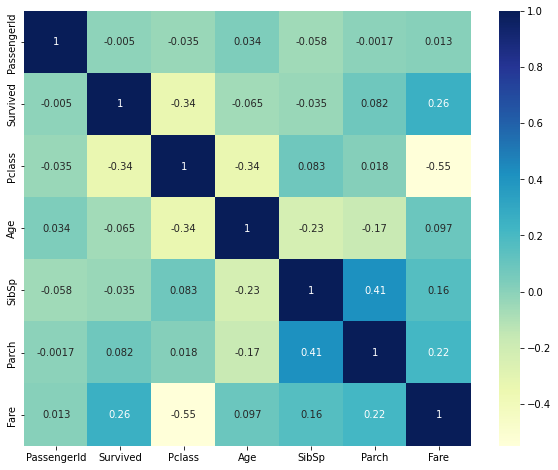

In [57]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix, annot=True, cmap='YlGnBu');

**Label Encoding**

In [58]:
#import library
from sklearn.preprocessing import LabelEncoder

In [59]:
#fit the model
label_encoder=LabelEncoder()

In [60]:
data['Sex']=label_encoder.fit_transform(data['Sex'])

In [61]:
data['Embarked']=label_encoder.fit_transform(data['Embarked'])

In [62]:
#display the colums
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [63]:
#drop unnecessary columns
data1=data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [64]:
#display 5 rows of data1
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [65]:
#setting features and target
X=data1.drop('Survived',axis=1)
y=data1['Survived']

In [66]:
#import library
from sklearn.model_selection import train_test_split

In [67]:
# splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Min Max Scaling**

In [68]:
#import library
from sklearn.preprocessing import MinMaxScaler

In [69]:
X1 = X.drop(['Pclass','SibSp','Parch','Sex','Embarked'], axis=1)

In [70]:
min_max_scaler=MinMaxScaler(feature_range=(0,1))

In [71]:
X1=min_max_scaler.fit_transform(X1)

In [72]:
X1=pd.DataFrame(X1,columns=['Age', 'Fare'])

In [73]:
X.drop(['Age','Fare'],axis=1,inplace=True)

In [74]:
X=pd.concat([X,X1],axis=1)

In [75]:
X.describe()

,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,0.523008,0.381594,1.536476,0.363679,0.062858
std,0.836071,0.477990,1.102743,0.806057,0.791503,0.163605,0.096995
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,1.000000,0.271174,0.015440
50%,3.000000,1.000000,0.000000,0.000000,2.000000,0.346569,0.028213
75%,3.000000,1.000000,1.000000,0.000000,2.000000,0.434531,0.060508
max,3.000000,1.000000,8.000000,6.000000,2.000000,1.000000,1.000000


**kNN Model**

In [76]:
#import library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [77]:
#set number for k in the range 3 to 29.Finding the accuracy score for different values for k
metric_k=[]
neighbors=range(3,30)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,y_train)
    y_pred_kNN=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

In [78]:
#print the list
metric_k

[0.7150837988826816,
 0.7262569832402235,
 0.7039106145251397,
 0.7318435754189944,
 0.7262569832402235,
 0.7206703910614525,
 0.7206703910614525,
 0.7150837988826816,
 0.7374301675977654,
 0.7206703910614525,
 0.7262569832402235,
 0.7318435754189944,
 0.7262569832402235,
 0.7430167597765364,
 0.7374301675977654,
 0.7262569832402235,
 0.7206703910614525,
 0.7262569832402235,
 0.7150837988826816,
 0.7262569832402235,
 0.7318435754189944,
 0.7262569832402235,
 0.7374301675977654,
 0.7094972067039106,
 0.7206703910614525,
 0.7150837988826816,
 0.7094972067039106]

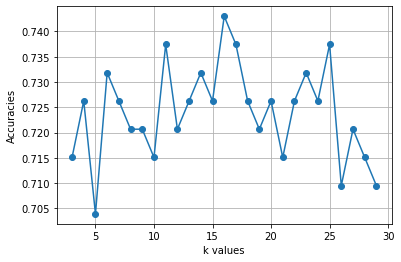

In [79]:
#Another method to find the accurate values.Plot graph
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()
plt.show()

In [80]:
#Same steps above with k=16
classifier=KNeighborsClassifier(n_neighbors=16)
classifier=classifier.fit(X_train,y_train)
y_pred_kNN=classifier.predict(X_test)

In [81]:
#print accuracy score
accuracy_score(y_test,y_pred_kNN)

0.7430167597765364

**K fold Cross validation**

In [82]:
#import library
from sklearn.model_selection import KFold

In [83]:
kfold_validator=KFold(10)

In [84]:
for train_index,test_index in kfold_validator.split(X,y):
  print("Training Index:",train_index)
  print("Test Index:",test_index)

Training Index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [85]:
#import library
from sklearn.model_selection import cross_val_score

In [86]:
cv_result=cross_val_score(classifier,X,y,cv=kfold_validator)

In [87]:
#print cross validation result
cv_result

array([0.8       , 0.83146067, 0.78651685, 0.84269663, 0.84269663,
       0.82022472, 0.80898876, 0.71910112, 0.84269663, 0.83146067])

In [88]:
#find mean of cross validation 
np.mean(cv_result)

0.8125842696629213

**Stratified K-Fold Cross Validation**

In [89]:
#import library
from sklearn.model_selection import StratifiedKFold

In [90]:
skfold_validator=StratifiedKFold(n_splits=10)

In [91]:
for train_index,test_index in skfold_validator.split(X,y):
  print("Training Index:",train_index)
  print("Test Index:",test_index)


Training Index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [92]:
skcv_result=cross_val_score(classifier,X,y,cv=skfold_validator)

In [93]:
#print skcv result
skcv_result

array([0.81111111, 0.82022472, 0.7752809 , 0.86516854, 0.84269663,
       0.82022472, 0.83146067, 0.74157303, 0.82022472, 0.83146067])

In [94]:
#find mean of skcv
np.mean(skcv_result)

0.8159425717852684

**SVM Model**

In [95]:
#import library
from sklearn.svm import SVC

In [96]:
#with linear keranal
svm_clf=SVC(kernel="linear")
svm_clf=svm_clf.fit(X_train,y_train)
y_pred_svm=svm_clf.predict(X_test)

In [97]:
#print accuracy score
accuracy_score(y_test,y_pred_svm)

0.7821229050279329

**K fold Cross validation**

In [98]:
kfold_validator=KFold(10)

In [99]:
for train_index,test_index in kfold_validator.split(X,y):
  print("Training Index:",train_index)
  print("Test Index:",test_index)

Training Index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [100]:
cv_result=cross_val_score(svm_clf,X,y,cv=kfold_validator)

In [101]:
#print cv result
cv_result

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [102]:
#find mean value of cv result
np.mean(cv_result)

0.786729088639201

**Stratified K-Fold Cross Validation**

In [103]:
skfold_validator=StratifiedKFold(n_splits=10)

In [104]:
for train_index,test_index in skfold_validator.split(X,y):
  print("Training Index:",train_index)
  print("Test Index:",test_index)

Training Index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [105]:
skcv_result=cross_val_score(svm_clf,X,y,cv=skfold_validator)

In [106]:
#print skcv result
skcv_result

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [107]:
#print mean value of skcv result
np.mean(skcv_result)

0.786729088639201

**SVM WITH RBF KERNAL**

In [108]:
#with Radial Basis Function (RBF)
svm_clf2=SVC(kernel="rbf")
svm_clf2=svm_clf2.fit(X_train,y_train)
y_pred_svm2=svm_clf2.predict(X_test)

In [109]:
#print accuracy score
accuracy_score(y_test,y_pred_svm2)

0.659217877094972

**K fold Cross validation**

In [110]:
kfold_validator=KFold(10)

In [111]:
for train_index,test_index in kfold_validator.split(X,y):
  print("Training Index:",train_index)
  print("Test Index:",test_index)

Training Index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [112]:
cv_result=cross_val_score(svm_clf2,X,y,cv=kfold_validator)

In [113]:
#print cv result
cv_result

array([0.78888889, 0.84269663, 0.76404494, 0.85393258, 0.79775281,
       0.80898876, 0.78651685, 0.7752809 , 0.85393258, 0.79775281])

In [114]:
#print mean value of cv result
np.mean(cv_result)

0.8069787765293384

**Stratified K-Fold Cross Validation**

In [115]:
skfold_validator=StratifiedKFold(n_splits=10)

In [116]:
for train_index,test_index in skfold_validator.split(X,y):
  print("Training Index:",train_index)
  print("Test Index:",test_index)


Training Index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [117]:
skcv_result=cross_val_score(svm_clf2,X,y,cv=skfold_validator)

In [118]:
#print skcv result
skcv_result

array([0.8       , 0.82022472, 0.7752809 , 0.85393258, 0.83146067,
       0.78651685, 0.80898876, 0.78651685, 0.82022472, 0.79775281])

In [119]:
#print mean of skcv result
np.mean(skcv_result)

0.8080898876404493